## Analysing and exploring titanic data set

This notebook analyses and explores the [titanic data set](https://www.kaggle.com/c/titanic/data) from kaggle.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# enable inline plotting
%matplotlib inline 

---
#### Load data

In [2]:
# to-do: load. the datasets with pandas
df_test = pd.read_csv("data/test.csv", sep = ',')
df_train = pd.read_csv("data/train.csv", sep = ',')

Overview of the loaded data:

In [3]:
df_test.head()
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test.info()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass  

In [5]:
df_test.describe()
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


---
#### Checking for and dropping NA
Important to avoid misinterpretation down the workflow.

In [6]:
df_train_cleaned = df_train.dropna(subset=['Age'])
df_test_cleaned = df_test.dropna(subset=['Age'])
# df_train_cleaned['Age'].values

Turning columns to numpy arrays:

In [7]:
arr = df_train_cleaned['Age'].to_numpy(dtype='int')
# or via numpy
# np.asarray(df_train_cleaned['Age'], dtype='int')

Applying some stats:

In [8]:
print(df_train_cleaned['Age'].mean())
print(df_train_cleaned["Age"].std())

29.69911764705882
14.526497332334044


#### Concatenating dataframes

In [9]:
# explore the arguments
# help(pd.concat)

In [10]:
# list of dataframes
df_list = [df_train, df_test]

# combine the two dataframes
df_combined = pd.concat(df_list, sort=True)
df_combined.describe()
df_combined.head()
# df_combined[df_combined['Name'] == 'Kelly, Mr. James'].head()


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


When worked with a df it may be useful to store it to disk:

In [11]:
# write the combined dataframe as a csv file
df_combined.to_csv('./data/combined.csv', index=False)

---
#### Quick and dirty plotting directly from dataframes

Histograms:

<Axes: >

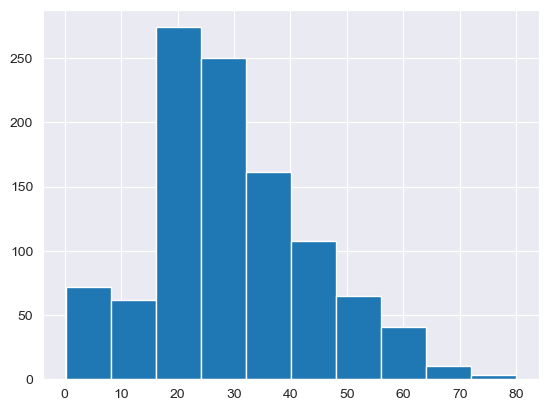

In [12]:
# Age
df_combined['Age'].hist()

<Axes: >

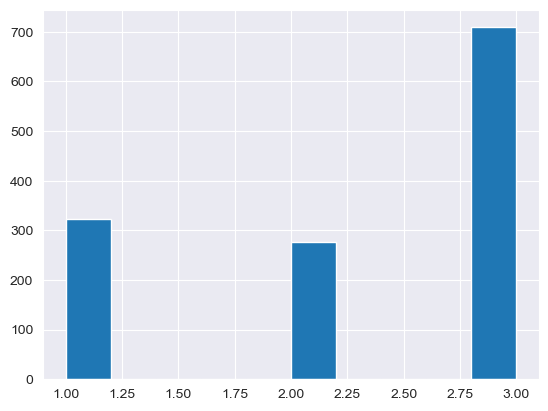

In [13]:
# pclass
df_combined['Pclass'].hist()

Plotting kernel density estimate (kde) for the pdf (probability distribution function).

<Axes: ylabel='Density'>

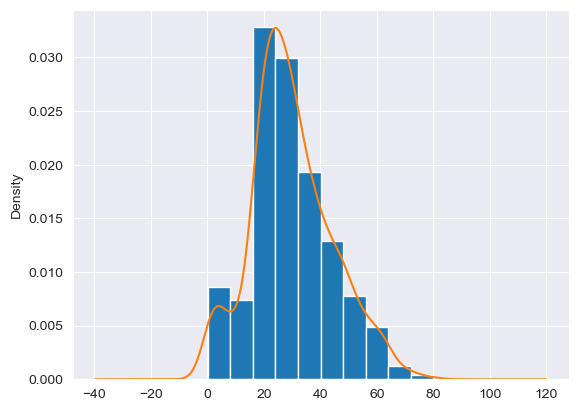

In [14]:
# to-do: make a normalized histogram and overplot the kde
df_combined['Age'].hist(density = True)
df_combined['Age'].plot.kde()

---
#### Pclass Histogram


<Axes: >

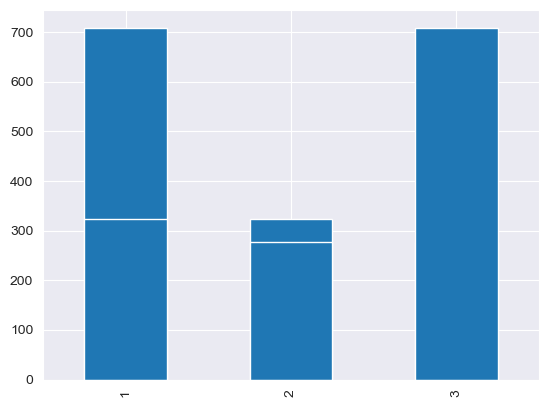

In [16]:
class_counts = df_combined['Pclass'].value_counts()
class_counts.plot(kind='bar')
# sort the bars
class_counts.sort_index().plot(kind='bar')

Using groupby to answer: What is the average age of those who survived?

In [17]:
survived = df_combined.groupby('Survived')
survived['Age'].mean()

Survived
0.0    30.626179
1.0    28.343690
Name: Age, dtype: float64

---
### Realtionship of survival probability with paid fare, age or sex.

Explore:

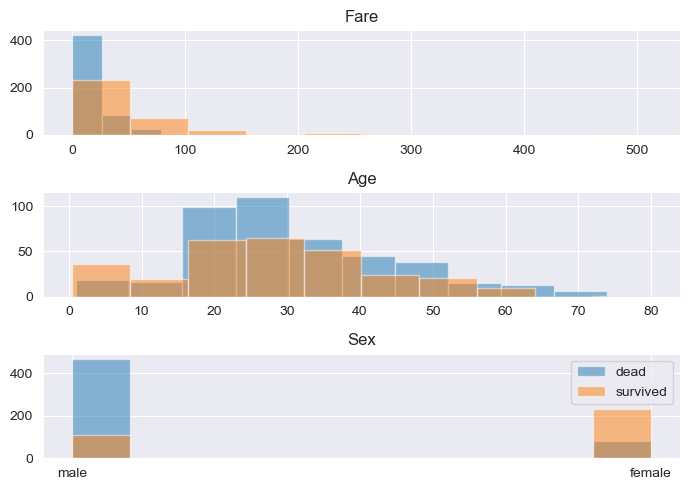

In [76]:
# preprocess:
survivors = df_combined[df_combined['Survived'] == 1]
dead = df_combined[df_combined['Survived'] == 0]

fig, axs = plt.subplots(3, 1, figsize = (7, 5))

for i, key in enumerate(["Fare", "Age", "Sex"]):
    axs[i].hist(dead[key], alpha = 0.5, label = "dead")
    axs[i].hist(survivors[key], alpha = 0.5, label = "survived")
    axs[i].set_title(key)

axs[2].legend()
plt.tight_layout()

### Relationship fare and sex

Text(0.5, 1.0, 'Survived by Sex')

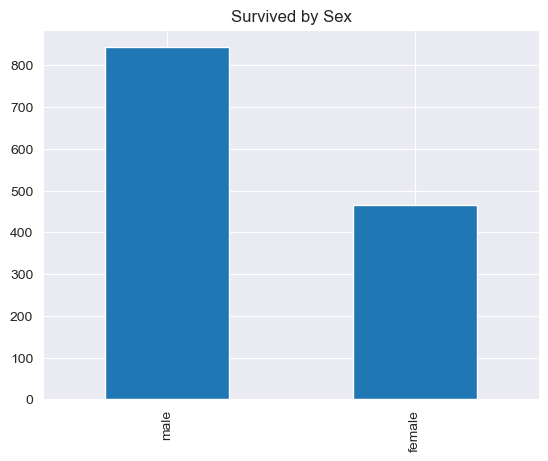

In [22]:
class_sex = df_combined['Sex'].value_counts()
class_sex.plot(kind = 'bar')
plt.title("Survived by Sex")

In [24]:
survivors = df_combined[df_combined['Survived'] == 1]
survivors[survivors['Age'] == max(survivors['Age'])]['Age']

630    80.0
Name: Age, dtype: float64

In [25]:
what fraction of men/women survived?
men = df_combined[df_combined['Sex'] == 'male']
women = df_combined[df_combined['Sex'] == 'female']
surv_men = men[men['Survived'] == 1]
surv_women = women[women['Survived'] == 1]
dead_men = men[men['Survived'] == 0]
dead_women = women[women['Survived'] == 0]
print('fraction of survived men:', (len(surv_men)/len(dead_men)))
print('fraction of survived women:', (len(surv_women)/len(dead_women)))
print('Please consider that not reported men and women were not included!')

fraction of survived men: 0.2329059829059829
fraction of survived women: 2.876543209876543
Please consider that not reported men and women were not included!


In [26]:
# to-do: what fraction of children survived?
# we consider everyone under 18 years of age a child in this code!
children = df_combined[df_combined['Age'] < 18]
children_surv = children[children['Survived'] == 1]
children_dead = children[children['Survived'] == 0]
print('fraction of survived children:', 1/(len(children_surv)/(len(children_dead))))
# print('please consider that not reported children were not included!')
# this is false: fraction goes from 0 to 1, look is up in the solutions

fraction of survived children: 0.8524590163934426


### Analysis of relationship of fare to survival

Explore:

Text(0.5, 1.0, 'Survived by Fair')

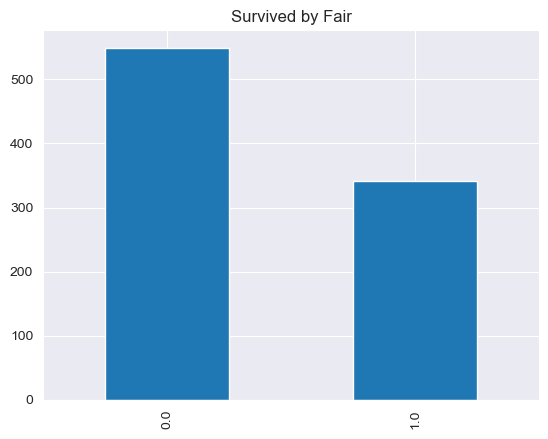

In [54]:
class_surv = df_combined['Survived'].value_counts()
class_surv.plot(kind = 'bar')
plt.title("Survived by Fair")

Analysis of normalized histograms:

Text(0.5, 0, 'paid fare')

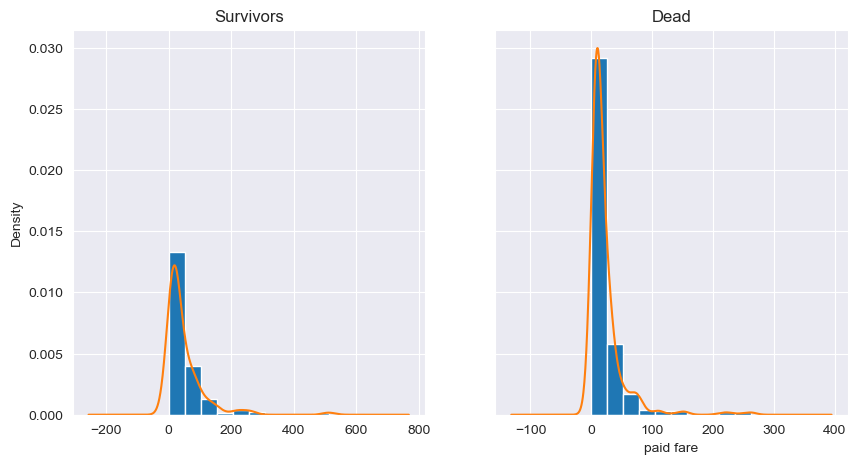

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5), sharey=True)
# plot survivors
survivors = df_combined[df_combined['Survived'] == 1]
survivors['Fare'].hist(density = True, ax = ax1)
ax1.set_title('Survivors')
plt.xlabel("paid fare")
survivors['Fare'].plot.kde(ax = ax1)
# plot dead
dead = df_combined[df_combined['Survived'] == 0]
dead['Fare'].hist(density = True, ax = ax2)
ax2.set_title('Dead')
dead['Fare'].plot.kde(ax = ax2)
plt.xlabel("paid fare")

---
#### Correlation between fare and survival:
Where people who paid more for the travel more likely to survive?

In [29]:
df_combined.groupby('Survived')["Fare"].mean()

Survived
0.0    22.117887
1.0    48.395408
Name: Fare, dtype: float64

##### Using a t-test
* **Independent Samples T-Test:** Used when you have two separate groups, and you want to compare the means of a single variable between these groups.
* **Paired Samples T-Test:** Used when you have two related groups (e.g., before and after measurements) and you want to compare the means of the paired data
* **One-Sample T-Test:** Used when you want to compare the mean of a single sample to a known population mean or a hypothesized value.

In [30]:
import scipy.stats as stats

# Choose two sided t-test

# Assuming df_combined is your DataFrame
# Separate "Fare" data based on "Survived" categories
fare_survived = df_combined[df_combined["Survived"] == 1]["Fare"].to_numpy()
fare_not_survived = df_combined[df_combined["Survived"] == 0]["Fare"].to_numpy()

# Perform independent t-test
t_statistic, t_p_value = stats.ttest_ind(fare_survived, fare_not_survived, equal_var=False)

# Perform Mann-Whitney U test: doesn't rely on assumption of normality or equal variance.
mw_statistic, mw_p_value = stats.mannwhitneyu(fare_survived, fare_not_survived, alternative="two-sided")

alpha = 0.05

print("T-Test Results:")
print("T-Statistic:", t_statistic)
print("P-Value:", t_p_value)
if t_p_value < alpha:
    print("Reject the null hypothesis using t-test.")
else:
    print("Fail to reject the null hypothesis using t-test.")

print("\nMann-Whitney U Test Results:")
print("Statistic:", mw_statistic)
print("P-Value:", mw_p_value)
if mw_p_value < alpha:
    print("Reject the null hypothesis using Mann-Whitney U test.")
else:
    print("Fail to reject the null hypothesis using Mann-Whitney U test.")


T-Test Results:
T-Statistic: 6.839099259085254
P-Value: 2.6993323503141236e-11
Reject the null hypothesis using t-test.

Mann-Whitney U Test Results:
Statistic: 129951.5
P-Value: 4.553477179250237e-22
Reject the null hypothesis using Mann-Whitney U test.


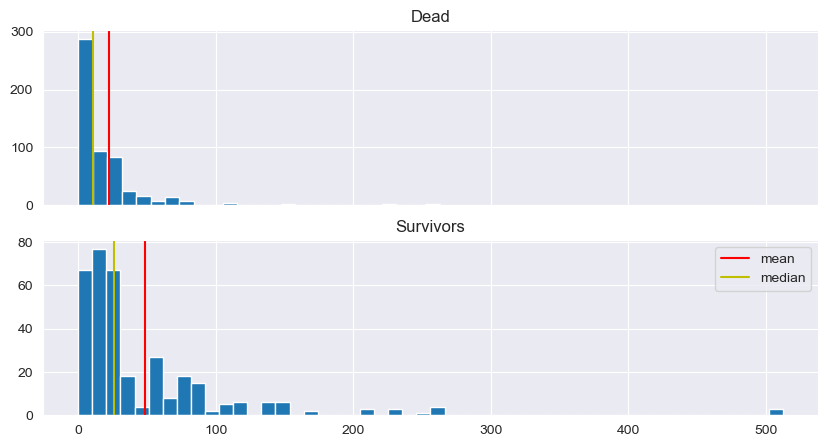

In [47]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10, 5), sharex = True)

survived = df_combined.groupby("Survived")
dead = df_combined[df_combined['Survived'] == 0]
dead['Fare'].hist(bins = 25, ax = ax1)
ax1.set_title('Dead')
ax1.axvline(survived['Fare'].mean()[0], color = 'r')
ax1.axvline(survived['Fare'].median()[0], color = 'y')

survivors = df_combined[df_combined['Survived'] == 1]
survivors['Fare'].hist(bins = 50, ax = ax2)
ax2.set_title('Survivors')
ax2.axvline(survived['Fare'].mean()[1], color = 'r', label = "mean")
ax2.axvline(survived['Fare'].median()[1], color = 'y', label = "median")
ax2.legend()

#### Conclusion

From the t-test and the two visualisations we can state that the alternative hypothesis applies. Thus, people who paid higher faires where more likely to survive. Accroding to the t-test statistic, which takes into account variability and means of the data, paying around 7 dollars more mean higher chance of survival. Furthermore, the small p-value indicates that the probality is approx. 10e-22 that the null-hyptheis would apply.